# API Exercises

Here are two exercises that involve working with APIs and dictionaries.

One is using the Open Brewery API found at https://www.openbrewerydb.org/, and the other is using the API for UK Police Data, found at https://data.police.uk/docs/.

You can complete them in either order!

Remember that you can create new cells with esc + a or b

## Breweries

### Q1: Load the first page of results with 50 results per page

In [1]:
import requests
import pandas as pd
url = 'https://api.openbrewerydb.org/breweries?page=1&per_page=50'
response = requests.get(url)
brewery_data1 = response.json()
brewery_data1[:1]

[{'id': 2,
  'name': 'Avondale Brewing Co',
  'brewery_type': 'micro',
  'street': '201 41st St S',
  'city': 'Birmingham',
  'state': 'Alabama',
  'postal_code': '35222-1932',
  'country': 'United States',
  'longitude': '-86.774322',
  'latitude': '33.524521',
  'phone': '2057775456',
  'website_url': 'http://www.avondalebrewing.com',
  'updated_at': '2018-08-23T23:19:57.825Z',
  'tag_list': []}]

### Q2: This is only the first 50 results.  Get the next 50 and put them together.

In [2]:
url2 = 'https://api.openbrewerydb.org/breweries?page=2&per_page=50'
response2 = requests.get(url2)
brewery_data2 = response2.json()
#put data together
brewery_data = brewery_data1 + brewery_data2
len(brewery_data)

100

### Q3: How many of these 100 breweries in are in Alaska?

In [3]:
#loc where column "state" has row "Alaska and get the count of that - return the city count
#df.loc[df['state'] == 'Alaska', 'city'].count()
#or
cnt = 0
for row in brewery_data:
    if row['state'] ==  'Alaska':
        cnt += 1
print(cnt)

3


### Q4: Of these 100 breweries, what are the different unique brewery types?

In [4]:
#list(df['brewery_type'].unique())
#or
set([x['brewery_type'] for x in brewery_data])


{'brewpub', 'contract', 'micro', 'planning', 'proprietor', 'regional'}

### Q5: What is the cloest brewery to "Devil's Potion Brewing Company LLC" ?
* Hint 1: Use Euclidian distance w/ longitude and latitude (assume longitude and latitude are a Carteisan coordinate system)
* Hint 2: You'll have to ignore the entries with "none" for latitude or longitude

In [5]:
devil_lat = None
devil_long = None
for row in brewery_data:
    if row['name'] == "Devil's Potion Brewing Company LLC": 
        devil_lat = row['latitude']
        devil_long = row['longitude']
print(devil_lat)
print(devil_long)

33.1216751
-117.0814849


In [6]:
d = {}
for row in brewery_data:
    try:
        distance = ((float(devil_long) - float(row['longitude'])) **2 + (float(devil_lat) - float(row['latitude']))**2)**0.5
    except:
        distance = 0
    if distance > 0:
        d[row['name']] = distance
#print(d)

In [7]:
#get store name of closest
min(d, key=d.get)

'Port Brewing Co / The Lost Abbey'

In [8]:
#get min distance
d[min(d, key=d.get)]

0.07051129653338688

### Q6: Write a function to find the closest brewery to any other given brewery

In [9]:
def closest_brew_dis(brew_name):
    lat1 = None
    long1 = None
    for row in brewery_data:
        if row['name'] == brew_name: 
            lat1 = row['latitude']
            long1 = row['longitude']
    #check if latitude has value
    if lat1:
        pass
    else:
        print('Error')
        return None
    #get distance dict
    d = {}
    for row in brewery_data:
        try:
            distance = ((float(long1) - float(row['longitude'])) **2 + (float(lat1) - float(row['latitude']))**2)**0.5
        except:
            distance = 0
        if distance > 0:
            d[row['name']] = distance
    print(min(d, key=d.get))
    
    

In [10]:
closest_brew_dis('Jackrabbit Brewing Co')

Urban Roots Brewing


### Q7: How would you get the first 10 pages from this API and put them all together using a for loop?

In [11]:
data = []
for i in range(10):
    #alter the page number in string 
    url = 'https://api.openbrewerydb.org/breweries?page='+str(i)+'&per_page=50'
    r = requests.get(url)
    data += r.json()
len(data)

500

# Crime in the UK

### We will be analyzing different crimes reported in the UK as provided by https://data.police.uk/docs/

# Exploratory analysis
##### 1. How many total crimes were there at latitude : 52.63902 and -1.131321 on November of 2017.
Use the street level crimes data, the documentation for the API can be found at https://data.police.uk/docs/method/crime-street/

In [12]:
import json
import requests
response = requests.get('https://data.police.uk/api/crimes-street/all-crime?lat=52.63902&lng=-1.131321&date=2017-11')
crimes = response.json()
len(crimes)
#This format would not work for some reason
# parameters = {'lat': 52.63902,
#              'lng': -1.131321,
#              'date': '2017-11'}
# response = requests.get('https://data.police.uk/docs/method/crime-street/', params=parameters)
# print(response.status_code)
# crimes = response.json()
# print(crimes)

1334

##### 2. We've queried the API once, but it could get annoying to retype the url over and over again, create a function `make_api_request` that enables you to query the API.


 The parameters for the function should be:
* lat (float) : latitude
* lng (float) : longitude
* date (string): Date in the format YYYY-MM
    * default value = `None`
    
And it should return a json object of 

for more information on default values check out http://blog.thedigitalcatonline.com/blog/2015/02/11/default-arguments-in-python/

In [13]:
def make_api_request(lat, lng, date=None):
    #check if date is given
    if date:
        response = requests.get('https://data.police.uk/api/crimes-street/all-crime?lat='+str(lat)+'&lng='+str(lng)+'&date='+str(date))
    else:
        response = requests.get('https://data.police.uk/api/crimes-street/all-crime?lat='+str(lat)+'&lng='+str(lng))
    return response.json()

In [14]:
test = make_api_request(52.63902,-1.131321,'2017-11')
test[:3]

[{'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.636721',
   'street': {'id': 883359, 'name': 'On or near Haymarket'},
   'longitude': '-1.132898'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 61226626,
  'location_subtype': '',
  'month': '2017-11'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.632993',
   'street': {'id': 883396, 'name': 'On or near Nightclub'},
   'longitude': '-1.129633'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 61226631,
  'location_subtype': '',
  'month': '2017-11'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.636110',
   'street': {'id': 883290, 'name': 'On or near Humberstone Gate'},
   'longitude': '-1.131802'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 61225055,
  'location_subtype': '',
  'month': '2017-11'}]

##### 3. Write a function `categories_of_crime` that will determine the count of each type of crime for a given latitude and longitude. This is labelled as 'category' in the records. Your function should call the `make_api_request` function you created.

The parameters for the function should be:

* lat (float) : latitude
* lng (float) : longitude
* date (str) default = None

The function should return:
* a dictionary with the count of each type of crime



Once you've created the function, try it with these locations
* lat, lng of 51.5017861,-0.1432319   (Buckingham Palace)
* lat, lng of 53.480161, -2.245163     (Manchester)

In [15]:
def categories_of_crime(lat, lng, date=None):
    #make api request
    crimes = make_api_request(lat, lng, date)
    cat_dict = {}
    for crime in crimes:
        #check if category is a key in dict
        if crime['category'] in cat_dict:
            cat_dict[crime['category']] += 1
        #first instance of crime in dict
        else:
            cat_dict[crime['category']] = 1
    return cat_dict

In [16]:
buckingham = (51.5017861,-0.1432319)
manchester = (53.480161,-2.245163)

buck = categories_of_crime(buckingham[0],buckingham[1])
print(buck)
print('\n')
manch = categories_of_crime(manchester[0],manchester[1])
print(manch)


{'anti-social-behaviour': 600, 'bicycle-theft': 44, 'burglary': 142, 'criminal-damage-arson': 78, 'drugs': 104, 'other-theft': 1203, 'possession-of-weapons': 14, 'public-order': 145, 'robbery': 177, 'shoplifting': 276, 'theft-from-the-person': 849, 'vehicle-crime': 215, 'violent-crime': 451, 'other-crime': 24}


{'anti-social-behaviour': 444, 'bicycle-theft': 41, 'burglary': 104, 'criminal-damage-arson': 108, 'drugs': 58, 'other-theft': 269, 'possession-of-weapons': 25, 'public-order': 214, 'robbery': 111, 'shoplifting': 234, 'theft-from-the-person': 277, 'vehicle-crime': 261, 'violent-crime': 501, 'other-crime': 45}


In [17]:
buck.keys()

dict_keys(['anti-social-behaviour', 'bicycle-theft', 'burglary', 'criminal-damage-arson', 'drugs', 'other-theft', 'possession-of-weapons', 'public-order', 'robbery', 'shoplifting', 'theft-from-the-person', 'vehicle-crime', 'violent-crime', 'other-crime'])

**Bonus**: 
* Write a function that determines the difference between Buckingham Palace and Manchester in terms of the number of crimes in each category.
    * In which category is there the largest absolute difference between the category of crime?
* Create a histogram depiction of the categories of crime

In [18]:
import math
def diff(dict_1, dict_2):
    diff_dict ={}
    for key in dict_1.keys():
        diff_dict[key] = abs(dict_1[key] - dict_2[key])
    return diff_dict


In [19]:
diff_bet = diff(buck, manch)

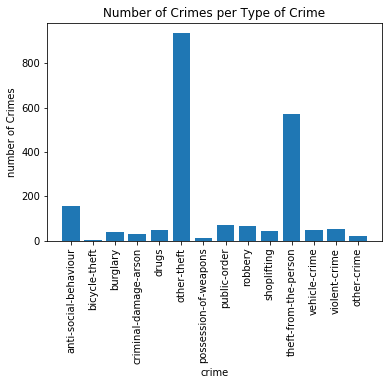

In [21]:
import matplotlib.pyplot as plt
plt.bar(list(diff_bet.keys()), diff_bet.values())
plt.xticks(rotation='vertical')
plt.xlabel('crime')
plt.ylabel('number of Crimes')
plt.title('Number of Crimes per Type of Crime')
plt.show()

##### 4. Create a function `find_outcome_statuses` that will determine outcome statuses for a given latitude and longitude and date (optional)?
Investigate the data to determine where the outcome statuses are located.

**NOTE**: You'll notice that some of these crimes do not have crime outcomes. Make these into the category of "Not Resolved."

**NOTE 2**: These might take a long time to execute if you do not specify a month

**Bonus**: What is the ratio of crimes investigated to those not investigated? Is it higher near London or Manchester?

In [22]:
import collections

def find_outcome_statuses(lat, lng, date=None):
    crimes = make_api_request(lat, lng, date)
    outcome_stat = []
    for crime in crimes:
        if crime['outcome_status']:
            #there exist another dict under outcome_status if it is present, append that
            outcome_stat.append(crime['outcome_status']['category'])
        else:
            #append not resolved
            outcome_stat.append('Not Resolved')
    #turn list to dict and return that
    return collections.Counter(outcome_stat)


In [23]:
buck_outcomes = find_outcome_statuses(buckingham[0],buckingham[1])
print(buck_outcomes)

Counter({'Under investigation': 2680, 'Investigation complete; no suspect identified': 819, 'Not Resolved': 600, 'Local resolution': 103, 'Awaiting court outcome': 79, 'Offender given a caution': 16, 'Offender given conditional discharge': 6, 'Offender given penalty notice': 5, 'Offender fined': 5, 'Offender given community sentence': 3, 'Offender sent to prison': 2, 'Offender given a drugs possession warning': 1, 'Offender given suspended prison sentence': 1, 'Defendant sent to Crown Court': 1, 'Defendant found not guilty': 1})


##### 5. Write a function `month_highest_crimes` that will return the month that had the highest number of crimes for a latitude, longitude and a year.

Inputs
* lat (float) : latitude
* lng (float) : longitude
* year (str) : in the format YYYY

Output
* month with highest crime (int)

**Bonus** Make a graph of how the number of crimes changed over time for a year. This will likely require a new function. Is seasonality a factor? Do the type of crimes change over time?

In [24]:
#def month_highest_crimes(lat, lng, year):
    #create dict keys representing months
    #have values be the num of crimes in that lat, lng, year with day
#     month_crime = {}
#     for i in list(range(1,13)):
#         month_crime[str[i]] = len(make_api_request(lat, lng, year+'-'+str(i)))
#     return max(month_crime, key=month_crime.get)


def month_highest_crimes(lat,lng,year):
    month_crimes = {}
    for month in range(1,13):
        month_crimes[str(month)] = len(make_api_request(lat,lng,year+'-'+str(month)))
    return max(month_crimes, key=month_crimes.get)

In [25]:
manch_highest_month = month_highest_crimes(manchester[0],manchester[1],'2016')
manch_highest_month

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Bonus Open Ended Questions

1. Take a look at the https://data.police.uk/docs/method/stops-street/ API. Is there a correlation between gender and being stopped and searched? How about race and being stopped and searched?